In [1]:
import pandas as pd
from pandas_datareader import data, wb
import datetime
import matplotlib.pyplot as plt
import seaborn
%matplotlib inline

seaborn.set_style('darkgrid')

start = datetime.date(2015, 12, 31)
end = datetime.date.today()

# Check we're still in 2016
if end < datetime.date(2017, 10, 1):
    pass
else:
    end = datetime.date(2016, 12, 31)

In [2]:
g_picks = {'RTN.L':'Restaurant Group', 'WPP.L': 'WPP','CAMB.L':'Cambria Automobiles','FGP.L':'Firstgroup',
           'ATK.L': 'WS Atkins', 'SGP.L':'Supergroup', 'PLND.L':'Poundland', 'DC.L':'Dixons Carphone',
           'ITV.L':'ITV', 'AZN.L':'Astrazeneca'}
symbols = [key for key in g_picks.keys()]

stock_data = data.DataReader(symbols, 'yahoo', start, end)

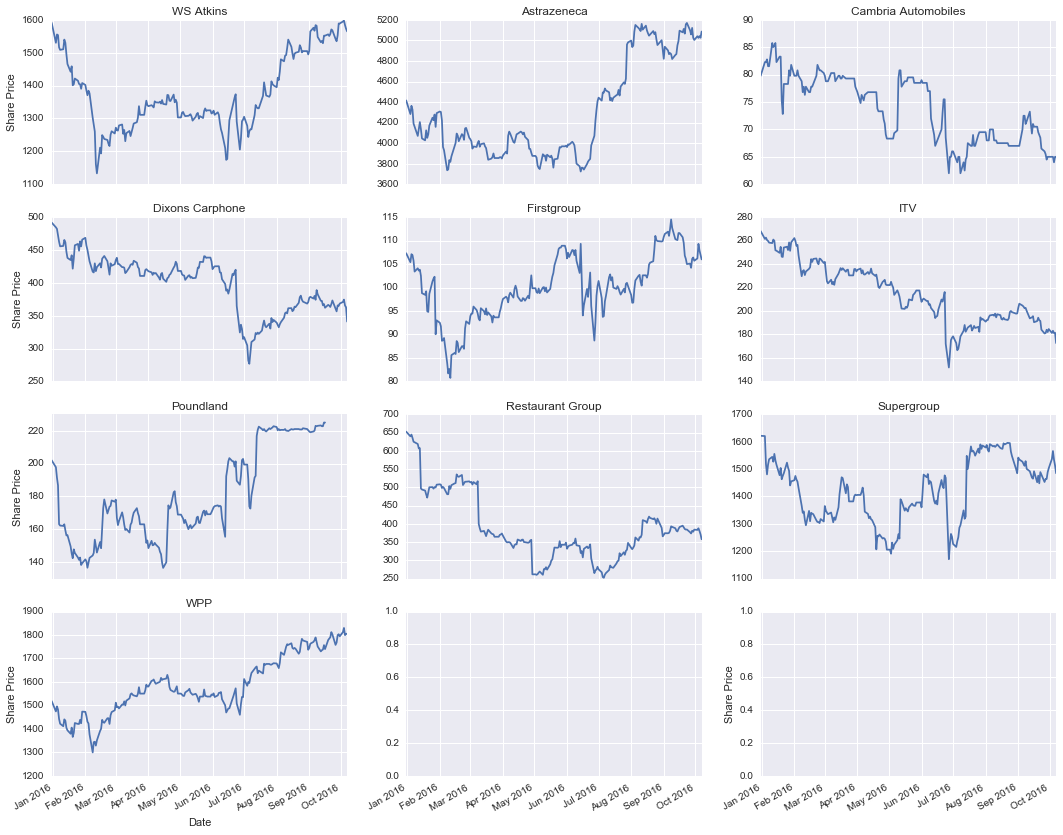

In [3]:
# Plot each stock individually
fig, ax = plt.subplots(4,3,figsize=(18,15), sharex=True)
i = j = 0
for key in stock_data.minor_axis:
    ax[i][j].plot(stock_data.minor_xs(key).index, stock_data.minor_xs(key)['Adj Close'])
    ax[i][j].set_xlabel('Date')
    ax[i][j].set_title(g_picks[key])
    if j == 0:
        ax[i][j].set_ylabel('Share Price')
    # Update i and j
    j += 1
    if j == 3:
        j = 0
        i += 1
# Format Dates for x axis
fig.autofmt_xdate()
plt.ylabel('Share Price')

In [4]:
index = stock_data.major_axis
df = pd.DataFrame(index=index, columns=[g_picks[key] for key in g_picks.keys()])

for key in stock_data.minor_axis:
    start_price = stock_data.minor_xs(key).loc[start,'Adj Close']
    change = stock_data.minor_xs(key)['Adj Close'].apply(lambda x: x / start_price)
    df[g_picks[key]] = change
    

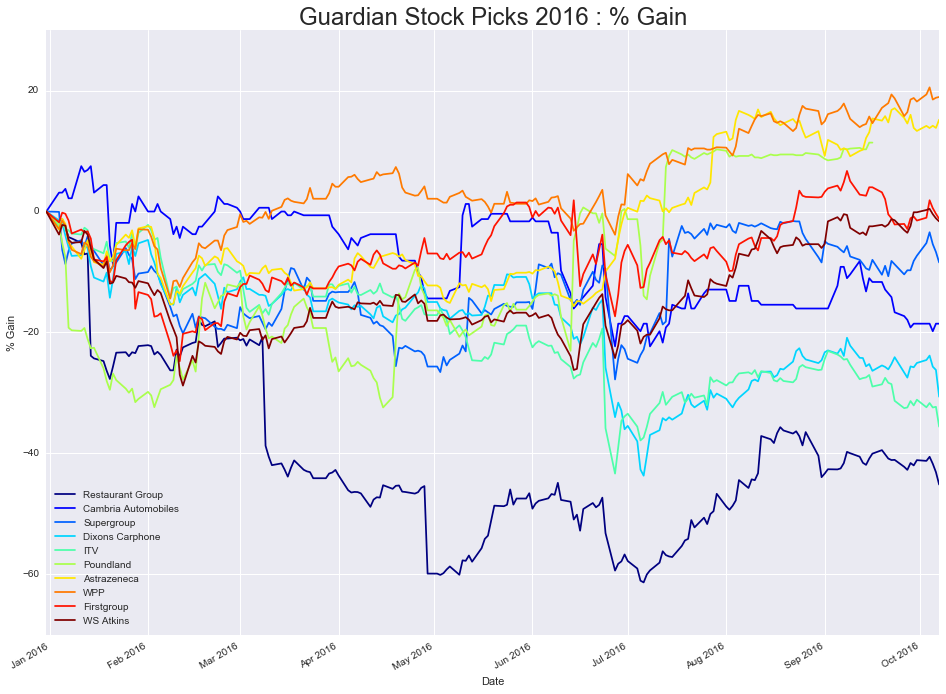

In [5]:
df = df.applymap(lambda x: (x-1) * 100)

ax = df.plot(x = df.index, kind='line', colormap='jet', figsize=(16,12))
ax.set_title('Guardian Stock Picks 2016 : % Gain', fontsize=24)
ax.set_ylabel('% Gain')

In [6]:
# YTD % Gain
last_date = [df[col].last_valid_index() for col in df.columns]
per_gain = [round(df.loc[last_date[i],df.columns[i]],2) for i in range(len(df.columns))]

df2 = pd.DataFrame({'Company' : df.columns, 'ytd % Gain':per_gain})
df2.sort_values('ytd % Gain',ascending=False,inplace=True)
print(df2)
av_gain = df2['ytd % Gain'].mean(axis=0)
print('\n Average gain: {}%'.format(round(av_gain,2)))

               Company  ytd % Gain
7                  WPP       18.94
6          Astrazeneca       15.18
5            Poundland       11.39
8           Firstgroup       -1.21
9            WS Atkins       -1.63
2           Supergroup       -8.42
1  Cambria Automobiles      -18.54
3      Dixons Carphone      -30.61
4                  ITV      -35.57
0     Restaurant Group      -45.14

 Average gain: -9.56%
